# Chapter: Machine Learning and Dynamic Process Modeling: An Introduction

## Topic:  Why careful choice of model matters 

### ###############################
### Step 1: Generate data from true process with SNR ~ 10

*True process (a = -0.8, b = 0.5):*

$x(k+1) + ax(k) = bu(k)$

$y(k) = x(k) + e(k)$

### ###############################

In [1]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from sippy import functionset as fset

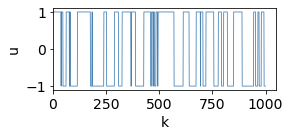

In [2]:
# generate white-noise-like input
np.random.seed(10)

prob_switch_1 = 0.05
[u,_,_] = fset.GBN_seq(1000, prob_switch_1)  

# plot u
plt.figure(figsize=(4,1.5))
plt.plot(u, 'steelblue', linewidth=0.8)
plt.ylabel('u'), plt.xlabel('k'), plt.xlim(0)
plt.show()

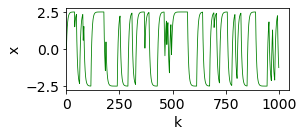

In [3]:
# generate internal state x
x = np.zeros((1000,))

for k in range(2,1000):
    x[k] = 0.8*x[k-1] + 0.5*u[k-1] # the internal process dynamics

# plot x
plt.figure(figsize=(4,1.5))
plt.plot(x, 'g', linewidth=0.8)
plt.ylabel('x'), plt.xlabel('k'), plt.xlim(0)
plt.show()

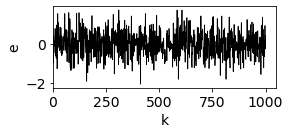

In [4]:
# generate output noise e
x_var = np.var(x)
SNR = 10
e_var = x_var/SNR
e_std = np.sqrt(e_var)

np.random.seed(10)
e = np.random.normal(loc=0, scale=e_std, size=(1000,))

# plot e
plt.figure(figsize=(4,1.5))
plt.plot(e, 'black', linewidth=0.8)
plt.ylabel('e'), plt.xlabel('k'), plt.xlim(0)
plt.show()

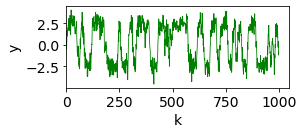

In [5]:
# generate output y
y = x + e

# plot y
plt.figure(figsize=(4,1.5))
plt.plot(y, 'g', linewidth=0.8)
plt.ylabel('y'), plt.xlabel('k'), plt.xlim(0)
plt.show()

In [6]:
# save data
simpleProcessData = np.column_stack((u, y))
np.savetxt('simpleProcess.csv', simpleProcessData, delimiter=',')

### ###############################
### Step 2: Fit ARX model via OLS
### ###############################

In [11]:
# import packages
import statsmodels.api as sm # statsmodels package is being used as it provides parameter error estimates as well

In [8]:
# read data
simpleProcessData = np.loadtxt('simpleProcess.csv', delimiter=',')
u = simpleProcessData[:,0]
y = simpleProcessData[:,1]

In [9]:
# generate response and regressors for ARX model
y_centered = y - np.mean(y)
u_centered = u - np.mean(u)

y_arx = y_centered[1:]
regressor_arx = np.column_stack((y_centered[:-1], u_centered[:-1]))

In [10]:
# fit ARX model via OLS
model = sm.OLS(y_arx, regressor_arx)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              3584.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:48:52   Log-Likelihood:                         -1129.0
No. Observations:                 999   AIC:                                      2262.
Df Residuals:                     997   BIC:                                      2272.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In the OLS results above, x1 refers to estimate of negative of parameter a and x2 refers to estimate of parameter b 